<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [17]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [18]:
import pandas as pd


Import matplotlib


In [19]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [20]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [21]:
# Count the number of duplicate rows
duplicate_count = df.duplicated(keep=False).sum()
print(f"Total duplicate rows: {duplicate_count}")

# Display the first few duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows.head())

Total duplicate rows: 40
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4        

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [22]:
import pandas as pd

# Identify duplicate rows based on selected subset of columns
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']
duplicate_subset = df[df.duplicated(subset=subset_cols, keep=False)]

# Count the occurrences of each duplicate group
duplicate_group_counts = duplicate_subset.groupby(subset_cols).size().reset_index(name='Count')

# Check which columns frequently have identical values within duplicate rows
identical_counts = duplicate_subset.drop(columns=subset_cols).nunique() == 1

# Display results
print(f"Total duplicate groups based on {subset_cols}: {duplicate_group_counts.shape[0]}")
print("\nDuplicate groups and their counts:")
print(duplicate_group_counts.head())

print("\nColumns that frequently contain identical values in duplicate rows:")
print(identical_counts[identical_counts].index.tolist())

Total duplicate groups based on ['MainBranch', 'Employment', 'RemoteWork']: 319

Duplicate groups and their counts:
                       MainBranch                               Employment  \
0  I am a developer by profession                      Employed, full-time   
1  I am a developer by profession                      Employed, full-time   
2  I am a developer by profession                      Employed, full-time   
3  I am a developer by profession  Employed, full-time;Employed, part-time   
4  I am a developer by profession  Employed, full-time;Employed, part-time   

                             RemoteWork  Count  
0  Hybrid (some remote, some in-person)  15288  
1                             In-person   7118  
2                                Remote  12196  
3  Hybrid (some remote, some in-person)     78  
4                             In-person     25  

Columns that frequently contain identical values in duplicate rows:
['Check']


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


/tmp/ipykernel_300/2202304434.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10], palette='viridis')


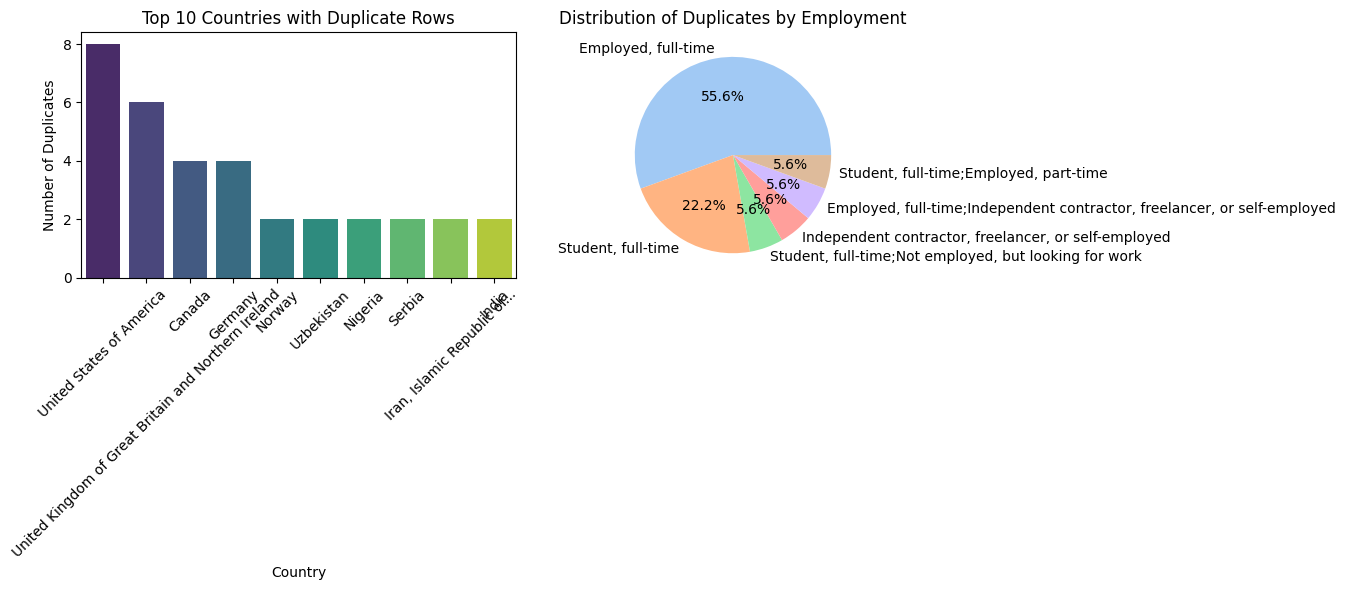

In [23]:
## Write your code here
!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Identify duplicate rows based on all columns
duplicate_rows = df[df.duplicated(keep=False)]

# Count duplicates by Country
country_counts = duplicate_rows['Country'].value_counts()

# Count duplicates by Employment
employment_counts = duplicate_rows['Employment'].value_counts()

# Set the figure size
plt.figure(figsize=(14, 6))

# Bar plot for duplicates by Country
plt.subplot(1, 2, 1)
sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10], palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Duplicate Rows")
plt.xlabel("Country")
plt.ylabel("Number of Duplicates")

# Pie chart for duplicates by Employment
plt.subplot(1, 2, 2)
plt.pie(employment_counts[:6], labels=employment_counts.index[:6], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Distribution of Duplicates by Employment")

# Show plots
plt.tight_layout()
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [24]:
columns_to_keep = [
    'ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode',
    'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
    'BuildvsBuy', 'TechEndorse', 'Country', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
    'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
    'WebframeWantToWorkWith', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'MiscTechHaveWorkedWith',
    'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
    'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
    'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
    'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
    'SOHow', 'SOComm', 'AISelect', 'AISent', 'AIBen', 'AIAcc', 'AIComplex', 'AIToolCurrently Using',
    'AIToolInterested in Using', 'AIToolNot interested in Using', 'AINextMuch more integrated', 'AINextNo change',
    'AINextMore integrated', 'AINextLess integrated', 'AINextMuch less integrated', 'AIThreat', 'AIEthics',
    'AIChallenges', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4',
    'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9', 'Frequency_1', 'Frequency_2',
    'Frequency_3', 'TimeSearching', 'TimeAnswering', 'Frustration', 'ProfessionalTech', 'ProfessionalCloud',
    'ProfessionalQuestion', 'Industry', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6',
    'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength',
    'SurveyEase', 'ConvertedCompYearly', 'JobSat'
]

# Drop columns that are not in the "columns_to_keep" list
df_cleaned = df[columns_to_keep]

# Save the cleaned DataFrame to a new CSV or continue working with it
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

# Check the cleaned DataFrame
print(df_cleaned.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork  \
0  Employed, full-time     Remote   
1  Employed, full-time     Remote   
2  Employed, full-time     Remote   
3   Student, full-time        NaN   
4   Student, full-time        NaN   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                         

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
